#### **Cleaning Data**

The goal of data cleaning is to get raw data into a format that’s ready for analysis

This includes:

- Converting columns to the correct data types for analysis;
- Handling data issues that could impact the results of your analysis;
- Creating new columns from existing columns that are useful for analysis.

The order in which you complete these data cleaning tasks will vary by dataset.


**Key objectives**:
1. Read in data from .csv file
2. Store the data in a DataFrame
3. Quickly explore the data in the DataFrame

#### **1. Data Type**

In [174]:
import pandas as pd

In [175]:
run_times = pd.read_excel('Data/Run Times.xlsx')
run_times.head(5)

,Name,Run Time,Warm Up Time,Location,Run Date,Race Date,Rain,Fee
0,Alexis,9.2343,3.5,“school”,2023-04-15 12:00:00,2023-06-01,False,$0.00
1,Alexis,10.3842,3.5,School,2023-04-22 12:30:00,2023-06-01,True,$0.00
2,Alexis,8.1209,3 min,“the gym”,2023-05-10 15:00:00,2023-06-01,False,$2.50
3,David,7.2123,2.2,“school”,2023-05-01 15:15:00,2023-06-15,False,$0.00
4,David,6.8342,2,“gym”,2023-05-10 16:30:00,2023-06-15,False,$2.50


In [176]:
# data types
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [177]:
run_times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Name          5 non-null      object        
 1   Run Time      5 non-null      float64       
 2   Warm Up Time  5 non-null      object        
 3   Location      5 non-null      object        
 4   Run Date      5 non-null      datetime64[ns]
 5   Race Date     5 non-null      datetime64[ns]
 6   Rain          5 non-null      bool          
 7   Fee           5 non-null      object        
dtypes: bool(1), datetime64[ns](2), float64(1), object(4)
memory usage: 417.0+ bytes


**Converting to datetime**: Use **pd.to_datetime()** to convert object columns into datetime columns. NaN values -> NaT (not a time). 

It's possible to specify the format using the format argument within the function: 

- **pd.to_datetime(Df_column_name, format='%Y-%M-%D')**

**Converting to numeric**: Use **pd.to_numeric()** to convert object columns into numeric columns. 
- To remove non-numeric charcters ($,%,etc), use **str.replace()**

It's possible to specify the format using the format argument within the function: 

- Example of use removing special-character and commas: **df.Df_column_name.str.replace('special-character', '').str.replace(',', '')**

In [178]:
# change Fee from object to numeric (replace dollar sign to nothing)
pd.to_numeric(run_times.Fee.str.replace('$',''))

0    0.0
1    0.0
2    2.5
3    0.0
4    2.5
Name: Fee, dtype: float64

In [179]:
# Fee column still the same because it's not saved
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                     object
dtype: object

In [180]:
run_times.Fee = pd.to_numeric(run_times.Fee.str.replace('$',''))

In [181]:
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time            object
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [182]:
run_times["Warm Up Time"]

0      3.5
1      3.5
2    3 min
3      2.2
4        2
Name: Warm Up Time, dtype: object

In [183]:
# change Warm Up Time from object to numeric
pd.to_numeric(run_times["Warm Up Time"], errors='coerce')

# coerce: invalid parsing will be set as NaN
# but it should be 3 min, not a NaN

0    3.5
1    3.5
2    NaN
3    2.2
4    2.0
Name: Warm Up Time, dtype: float64

In [184]:
# replace the 'min' word from the Warm Up Time column with nothing
run_times['Warm Up Time'].str.replace(' min', '')

0    NaN
1    NaN
2      3
3    NaN
4    NaN
Name: Warm Up Time, dtype: object

In [185]:
# replace the 'min' word from the Warm Up Time column with nothing
# but transform into string the value
# this will avoid to get NaN values as before
run_times['Warm Up Time'].astype('str').str.replace(' min', '')

0    3.5
1    3.5
2      3
3    2.2
4      2
Name: Warm Up Time, dtype: object

In [186]:
# to save the column
run_times['Warm Up Time'] = pd.to_numeric(run_times['Warm Up Time'].astype('str').str.replace(' min', ''))
run_times.dtypes

Name                    object
Run Time               float64
Warm Up Time           float64
Location                object
Run Date        datetime64[ns]
Race Date       datetime64[ns]
Rain                      bool
Fee                    float64
dtype: object

In [187]:
# change the Rain column from boolean to int (False =  0 and True = 1)
run_times.Rain.astype('int')

0    0
1    1
2    0
3    0
4    0
Name: Rain, dtype: int32

#### **2. Missing Data**

**Keys Objectives:**
1. Read in data from the Excel spreadsheet and store it in a Pandas DataFrame;
2. Check the data type of each column;
3. Convert object columns into numeric or datetime columns as needed;

In [188]:
df = pd.read_excel('Data/Student Grades.xlsx')
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
...,...,...,...,...
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN


#### **a. Find missing data**

There are various ways to represent **missing data** in Python.
- **np.NaN** - numpy's NaN is the most common representation (values are stored as floats)
- **pd.NA** - panda's NA is a newer missing data type (values can be stored as integers)
- **None** - base Python's default missing data type (doesn't allow numerical calculations)

The easiest way to identify missing data is with **.isna()** method.
- Also, it's possible to use **.info()** or **.value_counts(dropna=False)**

In [189]:
# All cells that have a NaN value
df.isna()
# returns True for any missing values

,Student,Class,Year,Grade
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
81,True,True,True,True
82,False,True,True,True
83,True,False,False,False
84,False,False,False,True


In [190]:
# Return the number of NaNs in each column
df.isna().sum()
# Use sum() to return the missing values by column

Student    2
Class      3
Year       6
Grade      4
dtype: int64

In [191]:
# Rows with any NaNs
df[df.isna().any(axis=1)]
# any(axis=1) display the rows with the missing values

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [192]:
# Quickly explore the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Student  84 non-null     object 
 1   Class    83 non-null     object 
 2   Year     80 non-null     object 
 3   Grade    82 non-null     float64
dtypes: float64(1), object(3)
memory usage: 2.8+ KB


In [193]:
# Unique values (including NaN) in the Year column
df.Year.value_counts(dropna=False)

Year
Freshman     35
Sophomore    24
Junior       20
NaN           6
Senior        1
Name: count, dtype: int64

#### **b. Handle missing data**

There are multiple ways to **handle missing data**:
- Keep the missing data as is
    - It's possible to use **.notna()** to keep non-missing data
        - Example: df[df['Column1'].notna()]
- Remove an entire row or column with missing data
    - df.dropna(): removes any rows with NaN values
    - df.dropna(how='all'): removes rows that only have NaN values
    - df.dropna(thresh=2): removes rows that dont have at least 'n' values
    - df.dropna(subset=['Column1']): removes row with NaN values in a specified column
- Impute missing numerical data with a 0 or a substitute like the average, mode, zero, mean, etc.
    - **.fillna()** method imputes missing data with an appropriate value
- Resolve the missing data based on your domain expertise

> Using .dropna() or .notna() to remove rows with missing data doesnt make permanent changes to the df. It's necessary to save the output to a new df (or the same one) or set the argument 'inplace=True'

In [194]:
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
81,NaN,NaN,NaN,NaN
82,Bennett,NaN,NaN,NaN
83,NaN,EDA,Junior,84.0
84,Gavin,EDA,Senior,NaN
85,Calvin,NaN,NaN,100.0


In [195]:
# Drop rows that don't have a student or class name
df[df.isna().any(axis=1)].dropna(subset=['Student', 'Class'])

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [196]:
df.shape

(86, 4)

In [197]:
# Apply to entire DataFrame
df.dropna(subset=['Student', 'Class'], inplace=True)

In [198]:
df.shape

(82, 4)

In [199]:
# Check the rows with missing grades
df[df.Grade.isna()]

,Student,Class,Year,Grade
62,Landon,Exploratory Data Analysis,Junior,NaN
84,Gavin,EDA,Senior,NaN


In [200]:
# Impute the NaN grades
df.Grade.fillna(df.Grade.mean(), inplace=True)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


In [201]:
# Check the rows with NaNs
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [202]:
# Look at all Freshman Seminar students
df[df.Class == 'Freshman Seminar']

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0
5,Mason,Freshman Seminar,Freshman,90.0
6,Isabella,Freshman Seminar,Freshman,90.0
7,Jacob,Freshman Seminar,NaN,88.0
8,William,Freshman Seminar,NaN,89.0
9,Ethan,Freshman Seminar,NaN,86.0


In [203]:
# Update a specific value
df.loc[7, 'Year'] = 'Freshman'

In [204]:
df.loc[7]

Student               Jacob
Class      Freshman Seminar
Year               Freshman
Grade                  88.0
Name: 7, dtype: object

In [205]:
# Update multiple values using np.where
import numpy as np

df.Year = np.where(df.Year.isna(), 'Freshman', df.Year)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,EDA,Junior,85.00
78,Charles,EDA,Junior,93.00
79,Connor,EDA,Junior,91.00
80,Riley,EDA,Junior,87.00


In [206]:
# Check the rows with NaNs
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade


#### **3. Inconsistent Text and Typos**

Inconsistent text and typos in a data set are represented by values that are either:
- Incorrect by a few digits or characters (typos);
- Inconsistent with the rest of a column.

This step is not a straightfoward approach, as there is no function that will automatically identify these situations.

While there is no specific method to identify inconsistent text & typos, you can take the following two approaches to check a column depending on its data type:
- **Categorical data**: look at the unique values in the column (_.value_counts()_);
- **Numerical data**: look at the decriptive stats of the column (_.describe()_).


#### **a. Find inconsistent text and typos**

In [207]:
# Find inconsistencies in categorical columns
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

In [208]:
# Exploratory Data Analysis students vs EDA students
df[df.Class.isin(['Exploratory Data Analysis', 'EDA'])]

,Student,Class,Year,Grade
58,Evelyn,Exploratory Data Analysis,Sophomore,89.00
59,Jack,Exploratory Data Analysis,Sophomore,84.00
60,Ella,Exploratory Data Analysis,Sophomore,200.00
61,Chloe,Exploratory Data Analysis,Sophomore,87.00
62,Landon,Exploratory Data Analysis,Junior,85.55
63,Christian,Exploratory Data Analysis,Junior,77.00
64,Jordan,Exploratory Data Analysis,Junior,83.00
65,Jonathan,Exploratory Data Analysis,Junior,82.00
66,Levi,Exploratory Data Analysis,Junior,91.00
67,Victoria,Exploratory Data Analysis,Junior,90.00


In [209]:
# Look at Intro to Python students vs Python students
df[df.Class.isin(['Intro to Python', 'Python'])]

,Student,Class,Year,Grade
12,Alexander,Intro to Python,Freshman,85.0
13,Logan,Intro to Python,Freshman,85.0
14,James,Intro to Python,Freshman,82.0
15,Daniel,Intro to Python,Freshman,85.0
16,Elijah,Intro to Python,Freshman,85.0
17,Benjamin,Intro to Python,Freshman,81.0
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Python,Freshman,80.0
20,Jayden,Intro to Python,Freshman,82.0
21,Aiden,Intro to Python,Freshman,86.0


In [210]:
# Find inconsistencies in categorical columns
df.Year.value_counts()

Year
Freshman     38
Sophomore    24
Junior       19
Senior        1
Name: count, dtype: int64

In [211]:
# Find inconsistencies in numerical columns
df.describe()

,Grade
count,82.000000
mean,85.550000
std,15.443965
min,45.000000
25%,81.000000
50%,85.275000
75%,89.750000
max,200.000000


### b. Handle inconsistent text and typos

You can fix inconsistent text & typos by using:

- **.loc[]** to update a value at a particular location;
- **np.where()** to update values in a column based on a conditional statement;
- **.map()** to map a set of values to another set of values (dictionaries);
- **String methods** like **str.lower()**, **str.strip()** & **str.replace()** to clean text data;

In [212]:
# Remember our DataFrame
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [213]:
# Check the unique class values
df.Class.value_counts()

Class
Intro to Python              25
Intro to SQL                 20
Freshman Seminar             12
Exploratory Data Analysis    12
EDA                          12
Python                        1
Name: count, dtype: int64

Use **np.where()** to update values based on a logical condition:

- np.where(**condition** [a logical expression that evaluates to True of False] , **if_true** [value to return when the expression is True], **if_false** [value to return when the expression is false])

This is different from the Pandas where method, which has similar functionality, but different syntax.

The NumPy function is used more often than the Pandas method
because **np.where is vectorized**, meaning it **executes faster**.


In [214]:
# Replace EDA with Exploratory Data Analysis
df.Class = np.where(df.Class == 'EDA', 'Exploratory Data Analysis', df.Class)
df.Class.value_counts()

# it combines EDA and Exploratory Data Analysis

Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Python                        1
Name: count, dtype: int64

In [215]:
# Replace Python with Intro to Python
df.Class = np.where(df.Class == 'Python', 'Intro to Python', df.Class)
df.Class.value_counts()

# it combines Python and Intro to Python

Class
Intro to Python              26
Exploratory Data Analysis    24
Intro to SQL                 20
Freshman Seminar             12
Name: count, dtype: int64

In [216]:
# Find grades over 100
df[df.Grade > 100]

,Student,Class,Year,Grade
60,Ella,Exploratory Data Analysis,Sophomore,200.0


In [217]:
# Replace the 200 value with 100
df.Grade = np.where(df.Grade > 100, 100, df.Grade)
df.Grade.describe()

count     82.000000
mean      84.330488
std        8.824663
min       45.000000
25%       81.000000
50%       85.275000
75%       89.750000
max      100.000000
Name: Grade, dtype: float64

In [218]:
# another way to change values in a column is using map()
class_mappings = {'Intro to Python': 'Intro to Python',
                  'Intro to SQL': 'Intro to SQL',
                  'EDA': 'Exploratory Data Analysis',
                  'Freshman Seminar': 'Freshman Seminar',
                  'Exploratory Data Analysis': 'Exploratory Data Analysis',
                  'Python': 'Intro to Python'}

In [219]:
# to save using map
# df.Class = df.Class.map(class_mappings)

It's useful to **use Map** when you're **trying to map all the values** in a column to another set of values. But then if you want to make one off changes, then that's where **np.where** is useful.

#### 4. **Duplicate Rows**

**Duplicate data** represents the presence of one or more redundant rows that contain the same information as another, and can therefore be removed.

- **Identifying**: Use **.duplicated()** to identify duplicate rows of data;
- **Removing**: Use **.drop_duplicates()** to remove duplicate rows of data.


### a. Find duplicate rows

In [220]:
# Remember our DataFrame
df.head()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.0
1,Olivia,Freshman Seminar,Freshman,86.0
2,Noah,Freshman Seminar,Freshman,86.0
3,Sophia,Freshman Seminar,Freshman,87.0
4,Liam,Freshman Seminar,Freshman,90.0


In [221]:
# Find the duplicate values and return bool
df.duplicated()

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
84    False
Length: 82, dtype: bool

In [222]:
# View the duplicate rows
df[df.duplicated()]

,Student,Class,Year,Grade
19,Mia,Intro to Python,Freshman,80.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


In [223]:
# View ALL the duplicates
df[df.duplicated(keep=False)]

,Student,Class,Year,Grade
18,Mia,Intro to Python,Freshman,80.0
19,Mia,Intro to Python,Freshman,80.0
42,Isaac,Intro to SQL,Sophomore,96.0
43,Isaac,Intro to SQL,Sophomore,96.0
44,Isaac,Intro to SQL,Sophomore,96.0


### b. Handle duplicate rows

In [224]:
# Remove the duplicate values
df.drop_duplicates()

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


In [225]:
# Save the results
df.drop_duplicates(inplace=True)
df

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


> When you drop the duplicate rows, there were some indexes that where removed.

In [226]:
df.iloc[40:45, :]

,Student,Class,Year,Grade
41,Charlotte,Intro to SQL,Sophomore,92.0
42,Isaac,Intro to SQL,Sophomore,96.0
45,Harper,Intro to SQL,Sophomore,93.0
46,Ryan,Intro to SQL,Sophomore,76.0
47,Sofia,Intro to SQL,Sophomore,79.0


In [227]:
# Clean up the index
# df.reset_index() # this will create a new column in df
df.reset_index(drop=True, inplace=True) # whithout extra column and saving the df

In [228]:
df.iloc[40:45, :]

,Student,Class,Year,Grade
40,Charlotte,Intro to SQL,Sophomore,92.0
41,Isaac,Intro to SQL,Sophomore,96.0
42,Harper,Intro to SQL,Sophomore,93.0
43,Ryan,Intro to SQL,Sophomore,76.0
44,Sofia,Intro to SQL,Sophomore,79.0


#### 5. **Outliers**

An **outlier** is a value in a data set that is much bigger or smaller than the others.

Depending on the goal of your analysis, you may want to ignore these outliers. In this case of grade, you see the class as a whole. Or if your goal is to look for studentes to support, then you can focus on these outliers studentes and give them an extra support.


### a. Find outliers

- You can identify outliers in different ways using plots and statistics;

#### i. Histograms

**Histograms** are used to visualize the **distribution (or shape) of a numerical column**.

- They help identify outliers by showing which values fall outside of the normal range.

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

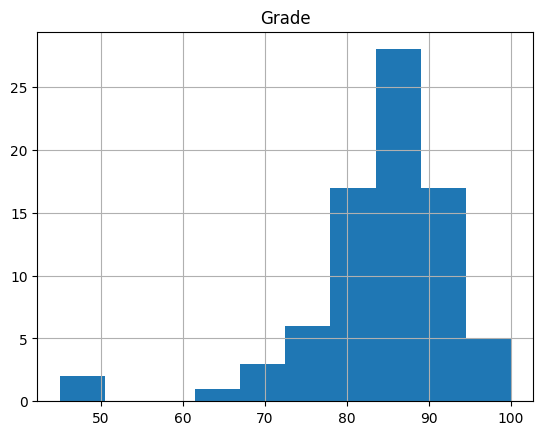

In [229]:
# basic histogram 
df.hist()

In [230]:
# difference between min and max grades
df.Grade.max() - df.Grade.min()

55.0

array([[<Axes: title={'center': 'Grade'}>]], dtype=object)

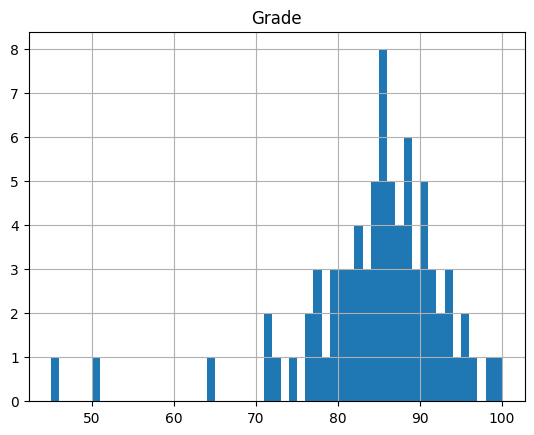

In [231]:
# change the bin size to show each grade individually
df.hist(bins=55)

<Axes: ylabel='Count'>

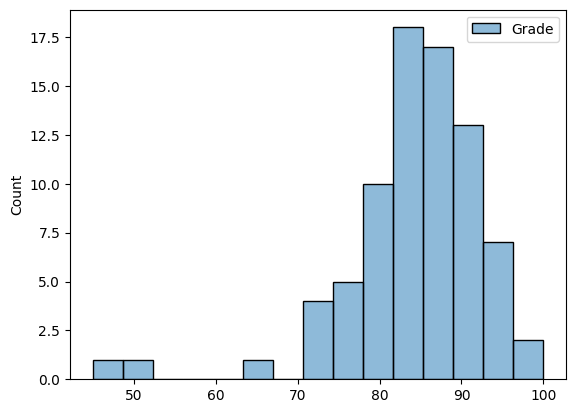

In [232]:
# histogram using seaborn
import seaborn as sns

sns.histplot(df)

<Axes: xlabel='Grade', ylabel='Count'>

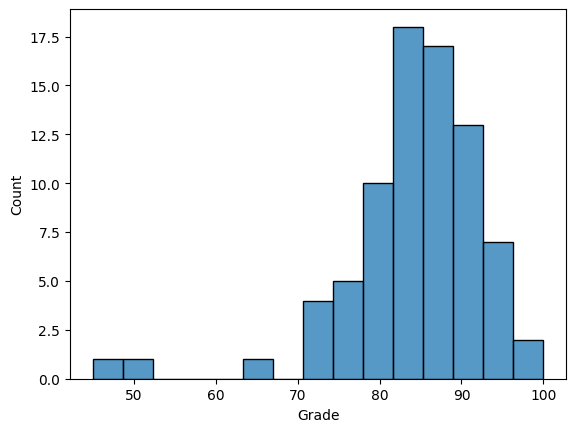

In [233]:
# look specifically at the grade column
sns.histplot(df.Grade)

<Axes: xlabel='Grade', ylabel='Count'>

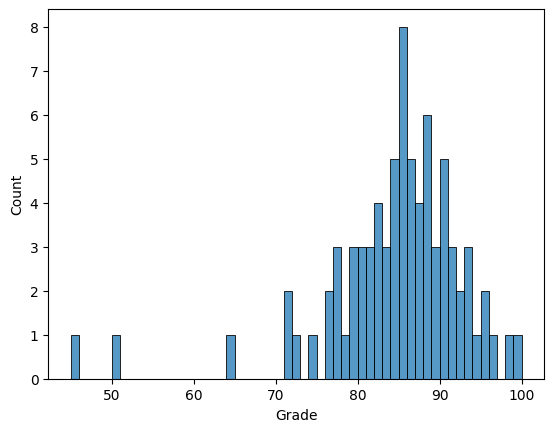

In [234]:
# specify that each bin should only include 1 grade
sns.histplot(df.Grade, binwidth=1)

#### ii. Box plots

**Boxplots** are used to visualize the descriptive statistics of a numerical column
- They automatically plot outliers as dots outside of the min/max data range

<Axes: xlabel='Grade'>

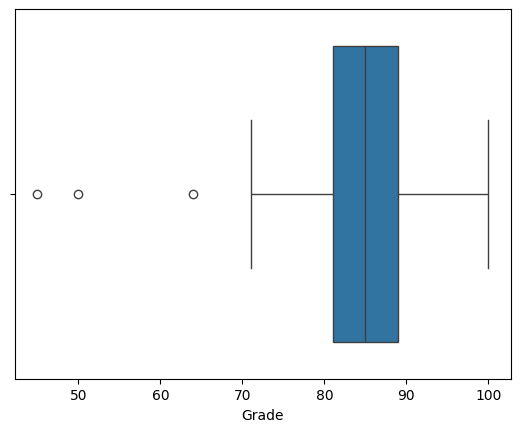

In [235]:
# box plot
sns.boxplot(x=df.Grade)

> The line is the median of the data. Q1 (left) and Q3 (right)represent the quartiles of the data.If you were to split the data into four parts, the bottom quartile would represent the lowest 25% of your data. The top quartile would represent 25% of your data, and that leaves the middle 50% of your data, which is represented by this box.

The width of the “box” is the interquartile range (IQR), which is the middle 50% of the data. Any value farther away than 1.5*IQR from each side of the box is considered an outlier.

<Axes: xlabel='Grade'>

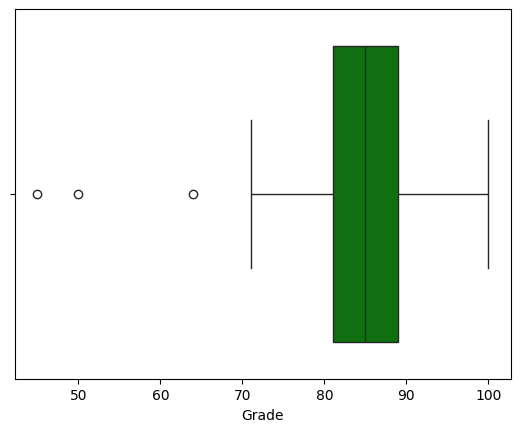

In [236]:
# box plot
sns.boxplot(x=df.Grade, color='green')

In [237]:
# identify the box plot outliers

# calculate the quartiles
q25, q50, q75 = np.percentile(df.Grade, [25, 50, 75])
iqr = q75 - q25

# calculate the min and max
min_grade = q25 - 1.5*iqr
max_grade = q75 + 1.5*iqr

# show calculations
min_grade, q25, q50, q75, max_grade

(69.0, 81.0, 85.0, 89.0, 101.0)

In [238]:
# identify the outliers
df[df.Grade < 69]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0
66,Jaxon,Exploratory Data Analysis,Junior,64.0


#### iii. Standard deviation

The **standard deviation** is a measure of the spread of a data set from the mean.

Values at least 3 standard deviations away from the mean are considered outliers:
- This is meant for normally distributed, or bell shaped, data
- The threshold of 3 standard deviations can be changed to 2 or 4+ depending on the data

In [239]:
# calculate the mean and standard deviation
mean = np.mean(df.Grade)
sd = np.std(df.Grade)

# show mean and standard deviation
mean, sd

(84.08987341772152, 8.723725033779411)

In [240]:
# identify points that are more than 3 standard deviations away
[grade for grade in df.Grade if (grade < mean - 3*sd) or (grade > mean + 3*sd)]

[50.0, 45.0]

In [241]:
# identify points that are more than 2 standard deviations away
[grade for grade in df.Grade if (grade < mean - 2*sd) or (grade > mean + 2*sd)]

[50.0, 45.0, 64.0]

In [242]:
# identify points that are more than 4 standard deviations away
[grade for grade in df.Grade if (grade < mean - 4*sd) or (grade > mean + 4*sd)]

[45.0]

In [243]:
# view all ordered grades
df.Grade.sort_values()

53     45.0
36     50.0
66     64.0
35     71.0
39     71.0
      ...  
67     95.0
32     95.0
41     96.0
49     98.0
57    100.0
Name: Grade, Length: 79, dtype: float64

### b. Handle Outliers

Like with missing data, there are multiple ways to handle outliers:
- Keep outliers;
- Remove an entire row or column with outliers;
- Impute outliers with NaN or a substitute like the average, mode, max, etc.;
- Resolve outliers based on your domain expertise. 

#### i. Remove an entire row or column

In [244]:
# these are the two rows with outliers
df[df.Grade < 60]

,Student,Class,Year,Grade
36,John,Intro to Python,Freshman,50.0
53,Wyatt,Intro to SQL,Sophomore,45.0


In [246]:
# option 1: drop the two rows with outliers
df.drop([36, 53])

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
74,Aaron,Exploratory Data Analysis,Junior,85.00
75,Charles,Exploratory Data Analysis,Junior,93.00
76,Connor,Exploratory Data Analysis,Junior,91.00
77,Riley,Exploratory Data Analysis,Junior,87.00


In [ ]:
# option 2: this is the opposite of the result above
df[df.Grade >= 60]

,Student,Class,Year,Grade
0,Emma,Freshman Seminar,Freshman,86.00
1,Olivia,Freshman Seminar,Freshman,86.00
2,Noah,Freshman Seminar,Freshman,86.00
3,Sophia,Freshman Seminar,Freshman,87.00
4,Liam,Freshman Seminar,Freshman,90.00
...,...,...,...,...
77,Aaron,Exploratory Data Analysis,Junior,85.00
78,Charles,Exploratory Data Analysis,Junior,93.00
79,Connor,Exploratory Data Analysis,Junior,91.00
80,Riley,Exploratory Data Analysis,Junior,87.00


#### ii. Impute the data

In [ ]:
# identify the outliers
df.Grade < 60

0     False
1     False
2     False
3     False
4     False
      ...  
77    False
78    False
79    False
80    False
84    False
Name: Grade, Length: 79, dtype: bool

In [ ]:
# locate the outliers
df[df.Grade < 60]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,50.0
56,Wyatt,Intro to SQL,Sophomore,45.0


In [ ]:
# minimum of the non-outliers
min_grade = df[df.Grade > 60].Grade.min()
min_grade

64.0

In [ ]:
# update the outlier values with the minimum grade
df.Grade = np.where(df.Grade < 60, min_grade, df.Grade)
df.Grade

0     86.00
1     86.00
2     86.00
3     87.00
4     90.00
      ...  
77    85.00
78    93.00
79    91.00
80    87.00
84    85.55
Name: Grade, Length: 79, dtype: float64

In [ ]:
# confirm the updated values
df.loc[[37, 56]]

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0
56,Wyatt,Intro to SQL,Sophomore,64.0


#### iii. Resolve outliers based on domain expertise

In [ ]:
# see John's information
df[df.Student == 'John']

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,64.0


In [ ]:
# his last test wasn't logged and he should have an 74
df.loc[37, 'Grade'] = 74

In [ ]:
# confirm the updated value
df[df.Student == 'John']

,Student,Class,Year,Grade
37,John,Intro to Python,Freshman,74.0


### c. Review Clean Data

- missing values;
- inconsistent text and typos;
- duplicate data;
- outliers.

In [247]:
# no more missing data
df[df.isna().any(axis=1)]

,Student,Class,Year,Grade


In [248]:
# no more inconsistent categorical data
df.Class.value_counts()

Class
Intro to Python              25
Exploratory Data Analysis    24
Intro to SQL                 18
Freshman Seminar             12
Name: count, dtype: int64

In [249]:
# no more inconsistent numeric data
df.describe()

,Grade
count,79.000000
mean,84.089873
std,8.779468
min,45.000000
25%,81.000000
50%,85.000000
75%,89.000000
max,100.000000


In [250]:
# no more duplicate data
df[df.duplicated()]

,Student,Class,Year,Grade


<Axes: ylabel='Count'>

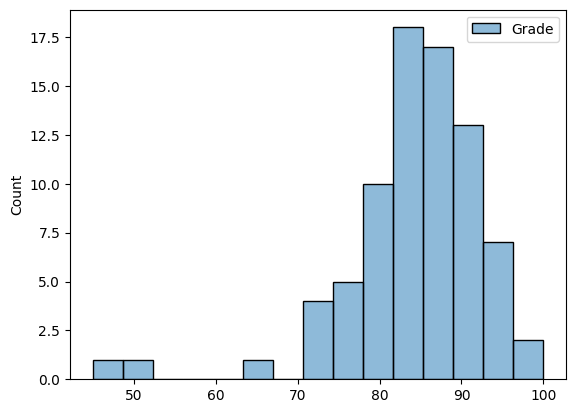

In [251]:
# no more outliers
sns.histplot(df)

#### 6. **Create New Columns From Numeric Columns**

After cleaning data types & issues, you may still not have the exact data that you need, so you can create new columns from existing data to aid your analysis
- Numeric columns – calculating percentages, applying conditional calculations, etc;
- Datetime columns – extracting datetime components, applying datetime calculations, etc;
- Text columns – extracting text, splitting into multiple columns, finding patterns, etc

In [252]:
# read in the data
groceries = pd.read_excel('Data/Groceries.xlsx')
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15


### a. basic math calculations

In [256]:
# increase price, round to two decimal places and save as a new column
groceries['New Column'] = round(groceries.Price_Dollars * 1.05, 2)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0


### b. Calculate percent of inventory

To **calculate a percentage**, you can set up two columns with the numerator and denominator values and then divide them (you can also multiply by 100 if desired).

In [257]:
groceries.Inventory.sum()

4857

In [258]:
# total inventory
groceries["Total Inventory"] = groceries.Inventory.sum()

In [255]:
# percent of inventory
groceries["Percent Inventory"] = round(groceries.Inventory / groceries['Total Inventory'] * 100, 1)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0


### c. Flag low inventory items

In [259]:
# create a column that flags low inventory
groceries['Low Inventory'] = np.where(groceries.Inventory < 50, 'Low Inventory', '')
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,


#### 7. **Create New Columns From DateTime Columns**

Use dt.component to extract a component from a datetime value (day, month, etc.)

- dt.date (without time component)
- dt.year
- dt.month (numeric month)
- dt.day
- dt.dayofweek (numeric weekday, mon=0, sun=7)
- dt.time (without date component)
- dt.hour (0-23)
- dt.minute (0-59)
- dt.second (0-59)

**Datetime calculations** between columns can be done using basic arithmetic
- Use **pd.to_timedelta()** to add or subtract a particular timeframe.


In [261]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,


In [ ]:
# extract the time
groceries['Last_Updated_Time'] = groceries.Last_Updated.dt.time
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00


In [ ]:
# extract the day of the week
groceries['Shipment_Date_DOW'] = groceries.Next_Scheduled_Shipment.dt.dayofweek
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,3
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,3
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,3
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,3
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,3


In [ ]:
# day of week mapping
dow_mapping = {0: 'Monday',
               1: 'Tuesday',
               2: 'Wednesday',
               3: 'Thursday',
               4: 'Friday',
               5: 'Saturday',
               6: 'Sunday'}

groceries['Shipment_Date_DOW'] = groceries['Shipment_Date_DOW'].map(dow_mapping)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,Thursday
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,Thursday
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,Thursday
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,Thursday
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday


In [ ]:
# add 1 day to shipment date
groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D')

0    2023-06-16
1    2023-06-16
2    2023-06-16
3    2023-06-16
4    2023-06-16
5    2023-06-16
6    2023-06-16
7    2023-06-16
8    2023-06-16
9    2023-06-16
10   2023-06-18
11   2023-06-18
12   2023-06-18
13   2023-06-18
14   2023-06-18
15   2023-06-18
16   2023-06-18
17   2023-06-25
18   2023-06-25
19   2023-06-25
20   2023-06-25
21   2023-06-29
22   2023-06-29
23   2023-06-29
24   2023-06-29
Name: Next_Scheduled_Shipment, dtype: datetime64[ns]

In [ ]:
# only add 1 day to fruit delivery
groceries['New_Shipment_Date'] = np.where(groceries.Category == 'Produce: Fruit',
         groceries.Next_Scheduled_Shipment + pd.to_timedelta(1, 'D'),
         groceries.Next_Scheduled_Shipment)
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Last_Updated_Time,Shipment_Date_DOW,New_Shipment_Date
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,15:35:00,Thursday,2023-06-16
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,18:30:00,Thursday,2023-06-16
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,17:22:00,Thursday,2023-06-16
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,16:29:00,Thursday,2023-06-16
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,18:10:00,Thursday,2023-06-16


#### 8. **Create New Columns From Text Columns**

- **Extracting Text**

You can use **.str[start:end]** to extract characters from a text field
> Note that the position of each character in a string is 0-indexed, and the “end” is non-inclusive.

- **Splitting into multiple columns**

Use **str.split()** to split a column by a delimiter into multiple columns

- **Finding patterns**

Use **str.contains()** to find words or patterns within a text field
-Regex stands for regular expression, which is a way of finding patterns within text.

In [263]:
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,


In [264]:
# remove the first character
groceries['Product_ID_Num'] = groceries.Product_ID.str[1:]
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Product_ID_Num
0,P100010,Produce: Fruit,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,100010
1,P100011,Produce: Fruit,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,100011
2,P100012,Produce: Fruit,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,100012
3,P100013,Produce: Fruit,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,100013
4,P100014,Produce: Fruit,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,100014


In [265]:
# check the data types
groceries.dtypes

Product_ID                         object
Category                           object
Item                               object
Price_Dollars                     float64
Inventory                           int64
Last_Updated               datetime64[ns]
Next_Scheduled_Shipment    datetime64[ns]
New Column                        float64
Total Inventory                     int64
Percent Inventory                 float64
Low Inventory                      object
Product_ID_Num                     object
dtype: object

In [266]:
# convert the data type from an obejct to an int
groceries.Product_ID_Num = groceries.Product_ID_Num.astype('int')

In [267]:
# split category
groceries[['Category', 'Subcategory']] = pd.DataFrame(groceries.Category.str.split(':').to_list())
groceries.head()

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Product_ID_Num,Subcategory
0,P100010,Produce,Apple,1.50,349,2023-06-12 15:35:00,2023-06-15,1.58,4857,7.2,,100010,Fruit
1,P100011,Produce,Banana,0.40,500,2023-06-12 18:30:00,2023-06-15,0.42,4857,10.3,,100011,Fruit
2,P100012,Produce,Grapes,4.00,200,2023-06-12 17:22:00,2023-06-15,4.20,4857,4.1,,100012,Fruit
3,P100013,Produce,Grapefruit,0.99,50,2023-06-12 16:29:00,2023-06-15,1.04,4857,1.0,,100013,Fruit
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,100014,Fruit


In [268]:
# find a term within the items column
# case sentitive
groceries['Organic'] = groceries.Item.str.lower().str.contains('organic')
groceries[groceries.Item.str.lower().str.contains('organic')]

,Product_ID,Category,Item,Price_Dollars,Inventory,Last_Updated,Next_Scheduled_Shipment,New Column,Total Inventory,Percent Inventory,Low Inventory,Product_ID_Num,Subcategory,Organic
4,P100014,Produce,Organic Strawberries,3.99,148,2023-06-12 18:10:00,2023-06-15,4.19,4857,3.0,,100014,Fruit,True
11,P100021,Produce,Chicken (Organic),10.49,284,2023-06-13 07:20:00,2023-06-17,11.01,4857,5.8,,100021,Meat,True
17,P100027,Pantry,Apple Sauce - organic,1.50,27,2023-06-10 12:02:00,2023-06-24,1.58,4857,0.6,Low Inventory,100027,Snacks,True


In [270]:
# reorder columns
groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated','Next_Scheduled_Shipment']].head()

,Product_ID,Product_ID_Num,Category,Subcategory,Item,Organic,Price_Dollars,Inventory,Percent Inventory,Low Inventory,Last_Updated,Next_Scheduled_Shipment
0,P100010,100010,Produce,Fruit,Apple,False,1.50,349,7.2,,2023-06-12 15:35:00,2023-06-15
1,P100011,100011,Produce,Fruit,Banana,False,0.40,500,10.3,,2023-06-12 18:30:00,2023-06-15
2,P100012,100012,Produce,Fruit,Grapes,False,4.00,200,4.1,,2023-06-12 17:22:00,2023-06-15
3,P100013,100013,Produce,Fruit,Grapefruit,False,0.99,50,1.0,,2023-06-12 16:29:00,2023-06-15
4,P100014,100014,Produce,Fruit,Organic Strawberries,True,3.99,148,3.0,,2023-06-12 18:10:00,2023-06-15


In [271]:
# save as new variable
groceries_with_new_columns = groceries[['Product_ID', 'Product_ID_Num', 'Category', 'Subcategory',
           'Item', 'Organic', 'Price_Dollars',
           'Inventory', 'Percent Inventory', 'Low Inventory',
           'Last_Updated', 'Next_Scheduled_Shipment']]

In [272]:
# pickle it for later
# groceries_with_new_columns.to_pickle('Data/groceries_with_new_columns.pkl')